In [1]:
from word_vec_loader import WordVectorLoader
import data
import numpy as np

In [2]:
data_path = './wordnet/noun_closure.tsv'
idx, objs, dwords = data.slurp(data_path, load_word=True, build_word_vector=True)
total_num = len(objs) + len(dwords)


Loading wordnet words
Total 40880 words are added
slurp: objects=82115, edges=801504, words=40880


In [24]:
import random
dist = []
mean_this_to_other = []
count = 10000000
very_close = set()
def norm(v):
    return np.sqrt(np.sum(v**2) ) 

def calc_dist(a, b):
    return np.sum(a * b) / (norm(a ) * norm(b))

vec = WordVectorLoader.word_vec
for i in range(len(WordVectorLoader.word_vec)):
    this_dist = []
    for _ in range(1000):
        b = random.randint(0, len(WordVectorLoader.word_vec) - 1)
        if b == i:
            continue
        v = calc_dist(vec[i], vec[b])
        dist.append(v)
        this_dist.append(v)
        if v > 0.999:
            very_close.add((i, b))
        if len(dist) % 1000000 == 0:
            print(len(dist))
        if len(dist) >= count:
            break
    mean_this_to_other.append(np.mean(this_dist))
    if len(dist) >= count:
        break


1000000
2000000
3000000
4000000
5000000
6000000
7000000
8000000
9000000
10000000


In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

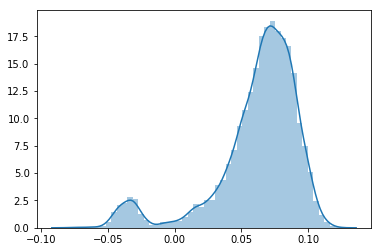

In [6]:
sns.distplot(mean_this_to_other)

In [13]:
dist = np.array(dist)

In [17]:
(dist >= 0.99).sum()


30405

In [15]:
dist[dist>=0.8] = 0

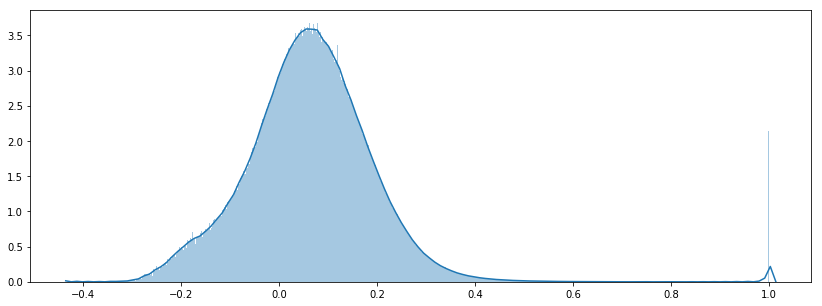

In [16]:
plt.figure(figsize=(14, 5))
sns.distplot(dist, kde=True, bins=1000)

In [27]:
print(np.mean(dist))
print(np.std(dist))

0.061601024
0.1308078
